# 02 - Data Understanding

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/03 03:28:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# read in data
wash_df = spark.read.csv("WASH.csv",header=True)
death_df = spark.read.csv("unsafewaterdeathrate.csv",header=True)
gdp_df = spark.read.csv("gdp-per-capita-worldbank.csv",header=True)

In [3]:
wash_df.show()
wash_df.columns

+------+-----------+--------------+--------------+----+--------+---------------+--------------------+
|  Type|     Region|Residence Type|  Service Type|Year|Coverage|     Population|       Facility type|
+------+-----------+--------------+--------------+----+--------+---------------+--------------------+
|income|High income|         total|    Sanitation|2012| 3.16338| 37038978.07131|Improved latrine ...|
|income|High income|         rural|    Sanitation|2012| 7.33999| 17285014.10345|Improved latrine ...|
|income|High income|         urban|    Sanitation|2012|  1.8344| 17158559.65143|Improved latrine ...|
|income|High income|         total|    Sanitation|2012|13.44265|157395356.05516|         Septic tank|
|income|High income|         rural|    Sanitation|2012|33.11531| 77983549.58889|         Septic tank|
|income|High income|         urban|    Sanitation|2012| 7.74518| 72446427.17412|         Septic tank|
|income|High income|         total|    Sanitation|2012|82.65761|967809663.03964|  

['Type',
 'Region',
 'Residence Type',
 'Service Type',
 'Year',
 'Coverage',
 'Population',
 'Facility type']

In [4]:
death_df.show()
death_df.columns

+-----------+----+----+---------------------------------------------------------------------------------------------------------------------+
|     Entity|Code|Year|Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized|
+-----------+----+----+---------------------------------------------------------------------------------------------------------------------+
|Afghanistan| AFG|1990|                                                                                                            1.0503434|
|Afghanistan| AFG|1991|                                                                                                            1.0454241|
|Afghanistan| AFG|1992|                                                                                                            1.0731887|
|Afghanistan| AFG|1993|                                                                                                            1.2799127|
|Afgha

['Entity',
 'Code',
 'Year',
 'Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized']

In [5]:
gdp_df.show()
gdp_df.columns

+-----------+----+----+---------------------------------------------------+
|     Entity|Code|Year|GDP per capita, PPP (constant 2017 international $)|
+-----------+----+----+---------------------------------------------------+
|Afghanistan| AFG|2002|                                          1280.4631|
|Afghanistan| AFG|2003|                                          1292.3335|
|Afghanistan| AFG|2004|                                          1260.0605|
|Afghanistan| AFG|2005|                                          1352.3207|
|Afghanistan| AFG|2006|                                          1366.9932|
|Afghanistan| AFG|2007|                                          1528.3446|
|Afghanistan| AFG|2008|                                          1556.8445|
|Afghanistan| AFG|2009|                                          1823.7426|
|Afghanistan| AFG|2010|                                          2026.1638|
|Afghanistan| AFG|2011|                                          1961.0963|
|Afghanistan

['Entity',
 'Code',
 'Year',
 'GDP per capita, PPP (constant 2017 international $)']

In [6]:
wash_df.printSchema()

root
 |-- Type: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Residence Type: string (nullable = true)
 |-- Service Type: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Coverage: string (nullable = true)
 |-- Population: string (nullable = true)
 |-- Facility type: string (nullable = true)



In [7]:
death_df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized: string (nullable = true)



In [8]:
gdp_df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- GDP per capita, PPP (constant 2017 international $): string (nullable = true)



# Data Manipulation

In [9]:
from pyspark.sql.types import (StructField,StringType,IntegerType,FloatType,StructType)

In [10]:
data_schema = [StructField('Entity',StringType(),True),
              StructField('Code',StringType(),True),
              StructField('Year',IntegerType(),True),
              StructField('Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized',FloatType(),True)]
final_struct = StructType(fields=data_schema)
death_df = spark.read.csv("unsafewaterdeathrate.csv",schema=final_struct,header=True)
death_df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized: float (nullable = true)



In [11]:
death_df.describe().show()

+-------+-----------+----+-----------------+---------------------------------------------------------------------------------------------------------------------+
|summary|     Entity|Code|             Year|Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized|
+-------+-----------+----+-----------------+---------------------------------------------------------------------------------------------------------------------+
|  count|       6840|6150|             6840|                                                                                                                 6840|
|   mean|       null|null|           2004.5|                                                                                                   2.2082172846679153|
| stddev|       null|null|8.656074225491706|                                                                                                     3.09963769859107|
|    min|Afghanistan| 

In [12]:
data_schema = [StructField('Entity',StringType(),True),
              StructField('Code',StringType(),True),
              StructField('Year',IntegerType(),True),
              StructField('GDP per capita, PPP (constant 2017 international $)',FloatType(),True)]
final_struct = StructType(fields=data_schema)
gdp_df = spark.read.csv("gdp-per-capita-worldbank.csv",schema=final_struct,header=True)
gdp_df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- GDP per capita, PPP (constant 2017 international $): float (nullable = true)



In [13]:
gdp_df.describe().show()

+-------+-----------+----+------------------+---------------------------------------------------+
|summary|     Entity|Code|              Year|GDP per capita, PPP (constant 2017 international $)|
+-------+-----------+----+------------------+---------------------------------------------------+
|  count|       6346|5902|              6346|                                               6346|
|   mean|       null|null|2005.9379136463915|                                 18068.999306997062|
| stddev|       null|null| 9.126633303541743|                                 20193.547789271048|
|    min|Afghanistan| ABW|              1990|                                           436.3764|
|    max|   Zimbabwe| ZWE|              2021|                                          157602.48|
+-------+-----------+----+------------------+---------------------------------------------------+



In [14]:
data_schema = [StructField('Type',StringType(),True),
              StructField('Region',StringType(),True),
              StructField("Residence Type",StringType(),True),
              StructField("Service Type",StringType(),True),
              StructField('Year',IntegerType(),True),
              StructField('Coverage',FloatType(),True),
              StructField('Population',FloatType(),True),
              StructField('Facility type',StringType(),True)]
final_struct = StructType(fields=data_schema)
wash_df = spark.read.csv("WASH.csv",schema=final_struct,header=True)
wash_df.printSchema()

root
 |-- Type: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Residence Type: string (nullable = true)
 |-- Service Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Coverage: float (nullable = true)
 |-- Population: float (nullable = true)
 |-- Facility type: string (nullable = true)



In [15]:
wash_df.describe().show()

+-------+------+-------------------+--------------+--------------+-----------------+-----------------+--------------------+--------------------+
|summary|  Type|             Region|Residence Type|  Service Type|             Year|         Coverage|          Population|       Facility type|
+-------+------+-------------------+--------------+--------------+-----------------+-----------------+--------------------+--------------------+
|  count|   600|                600|           600|           600|              600|              600|                 600|                 600|
|   mean|  null|               null|          null|          null|           2016.5|33.61109341591597|4.3656411323833334E8|                null|
| stddev|  null|               null|          null|          null|2.874677887159652|27.21752830198907| 4.782407787147155E8|                null|
|    min|income|        High income|         rural|Drinking water|             2012|          0.78282|           7231180.5|Improve

# Data Visulization

In [16]:
import matplotlib.pyplot as plt

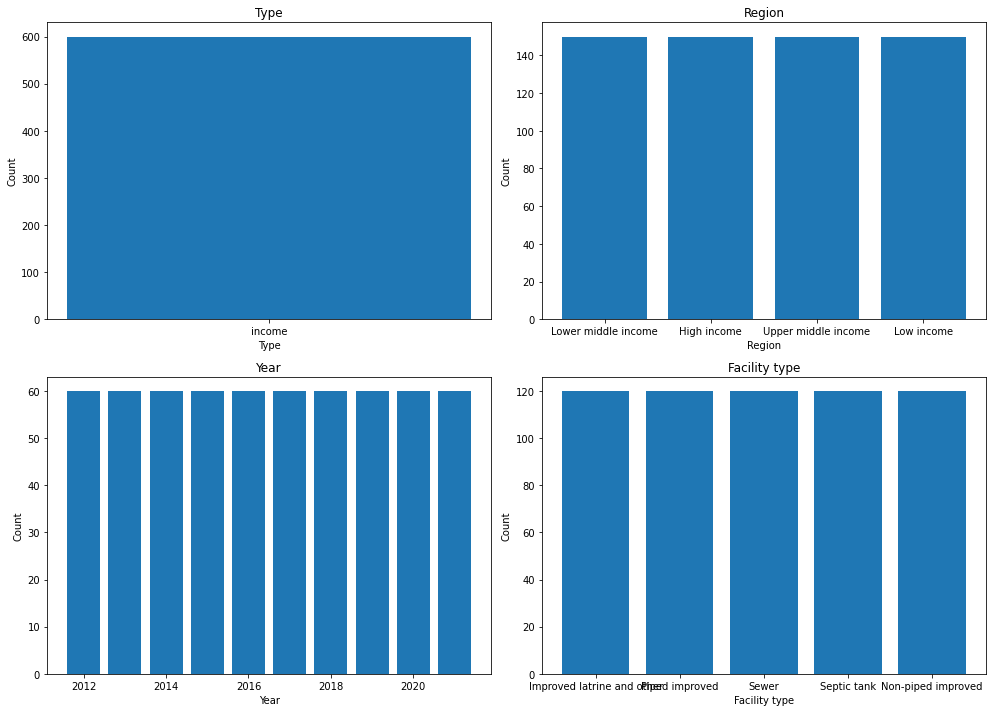

In [17]:
from pyspark.sql.functions import count

type_counts = wash_df.groupBy('Type').agg(count('*').alias('Count')).toPandas()
region_counts = wash_df.groupBy('Region').agg(count('*').alias('Count')).toPandas()
year_counts = wash_df.groupBy('Year').agg(count('*').alias('Count')).toPandas()
facility_counts = wash_df.groupBy('Facility type').agg(count('*').alias('Count')).toPandas()
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].bar(type_counts['Type'], type_counts['Count'])
axes[0, 0].set_title('Type')
axes[0, 0].set_xlabel('Type')
axes[0, 0].set_ylabel('Count')

axes[0, 1].bar(region_counts['Region'], region_counts['Count'])
axes[0, 1].set_title('Region')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Count')

axes[1, 0].bar(year_counts['Year'], year_counts['Count'])
axes[1, 0].set_title('Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Count')

axes[1, 1].bar(facility_counts['Facility type'], facility_counts['Count'])
axes[1, 1].set_title('Facility type')
axes[1, 1].set_xlabel('Facility type')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

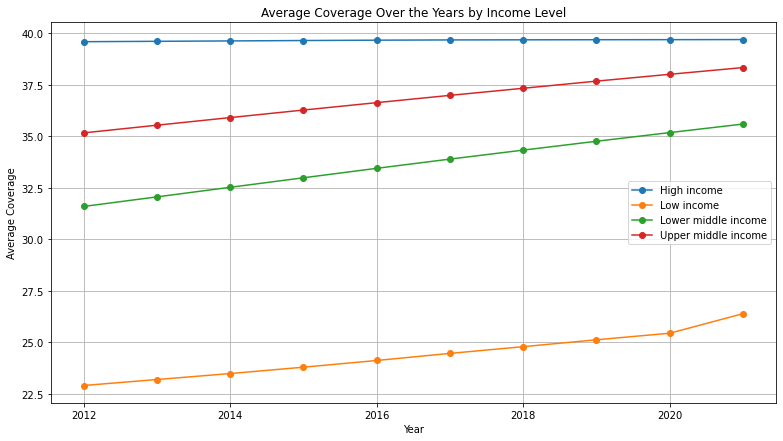

In [18]:
# Line plot of average coverage by different IncomeLevel against Year
from pyspark.sql.functions import avg
avg_coverage_by_income = (wash_df.groupBy('Year', 'Region').agg(avg('Coverage').alias('AvgCoverage')).orderBy('Year', 'Region').toPandas())
plt.figure(figsize=(13, 7))
for income_level in avg_coverage_by_income['Region'].unique():
    subset = avg_coverage_by_income[avg_coverage_by_income['Region'] == income_level]
    plt.plot(subset['Year'], subset['AvgCoverage'], label=income_level, marker='o')
plt.title('Average Coverage Over the Years by Income Level')
plt.xlabel('Year')
plt.ylabel('Average Coverage')
plt.legend()
plt.grid(True)
plt.show()

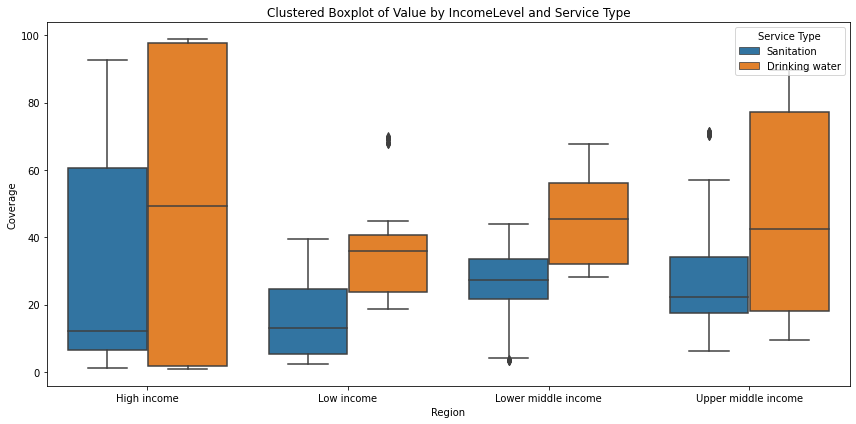

In [19]:
# clustered boxplot of different IncomeLevel and Service type
import seaborn as sns

# Convert the Spark DataFrame to a Pandas DataFrame
wash_df_pandas = wash_df.toPandas()

# Create a clustered boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=wash_df_pandas, x='Region', y='Coverage', hue='Service Type')
plt.title('Clustered Boxplot of Value by IncomeLevel and Service Type')
plt.legend(title='Service Type', loc='upper right')
plt.tight_layout()
plt.show()

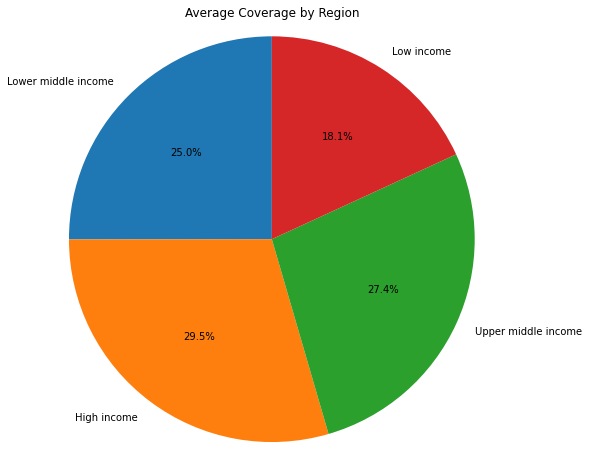

In [20]:
# Pie chart of average coverage by IncomeLevel
agg_data = wash_df.groupBy('Region').agg(avg('Coverage').alias('AvgCoverage')).collect()
labels = [row['Region'] for row in agg_data]
sizes = [row['AvgCoverage'] for row in agg_data]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.title('Average Coverage by Region')
plt.show()

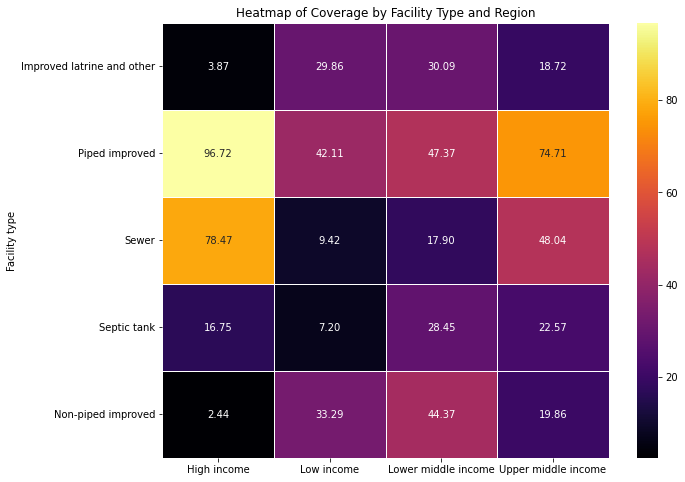

In [21]:
grouped_data = wash_df.groupBy('Region', 'Facility type').agg(avg('Coverage').alias('Coverage'))
pivot_data = grouped_data.groupBy('Facility type').pivot('Region').sum('Coverage')

pivot_data_pandas = pivot_data.toPandas()
pivot_data_pandas.set_index("Facility type", inplace=True) 

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data_pandas, annot=True, cmap="inferno", fmt=".2f", linewidths=.5)
plt.title('Heatmap of Coverage by Facility Type and Region')
plt.show()

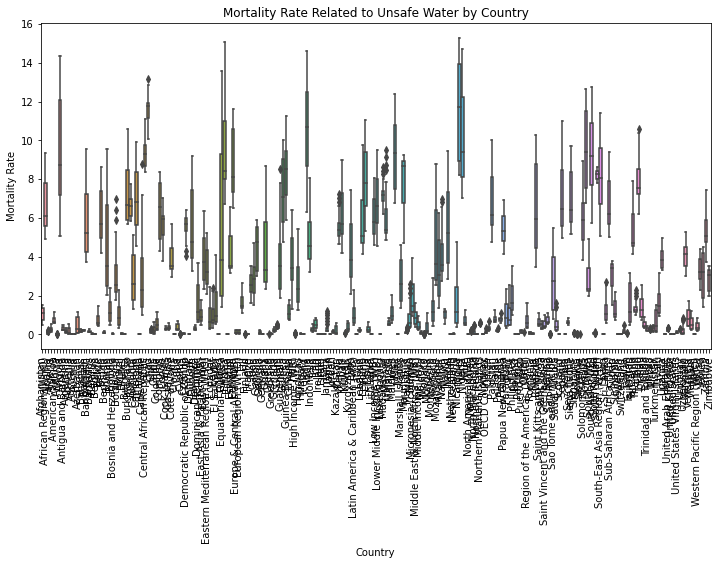

In [22]:
# box plot of mortality rate by country
data = death_df.select("Entity", "Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized").collect()
entities = [row['Entity'] for row in data]
mortality_rates = [row['Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized'] for row in data]

plt.figure(figsize=(12, 6))
sns.boxplot(x=entities, y=mortality_rates)
plt.xticks(rotation=90) 
plt.title("Mortality Rate Related to Unsafe Water by Country")
plt.ylabel("Mortality Rate")
plt.xlabel("Country")
plt.show()

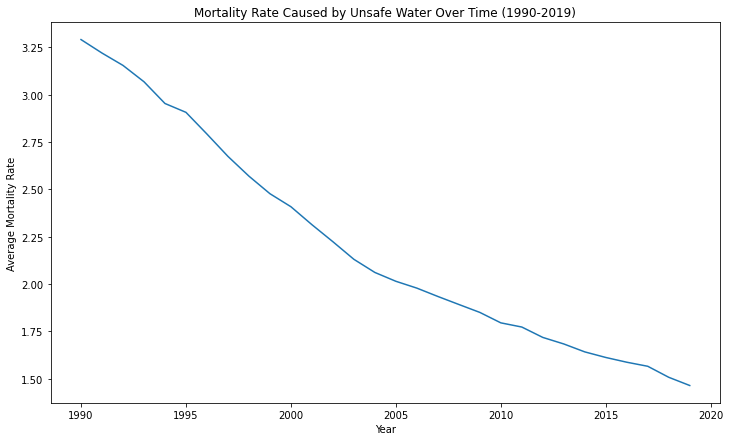

In [23]:
agg_df = death_df.groupBy('Year').agg(avg("Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized").alias("AvgMortalityRate")).orderBy('Year')
collected_data = agg_df.collect()
years = [row['Year'] for row in collected_data]
avg_mortality_rates = [row['AvgMortalityRate'] for row in collected_data]
plt.figure(figsize=(12, 7))
sns.lineplot(x=years, y=avg_mortality_rates)
plt.title('Mortality Rate Caused by Unsafe Water Over Time (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate')
plt.show()

## Data Quality

In [24]:
# Missing datas
from pyspark.sql.functions import sum as spark_sum, col,when

missing_values_wash = wash_df.agg(*[spark_sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in wash_df.columns]).collect()[0]

print("Missing values in each column of wash_df:")
for col_name, missing_count in zip(wash_df.columns, missing_values_wash):
    print(col_name, ":", missing_count)

missing_values_death = death_df.agg(*[spark_sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in death_df.columns]).collect()[0]

print("\nMissing values in each column of death_df:")
for col_name, missing_count in zip(death_df.columns, missing_values_death):
    print(col_name, ":", missing_count)

Missing values in each column of wash_df:
Type : 0
Region : 0
Residence Type : 0
Service Type : 0
Year : 0
Coverage : 0
Population : 0
Facility type : 0

Missing values in each column of death_df:
Entity : 0
Code : 690
Year : 0
Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized : 0


In [25]:
# Identify outliers and extremes in wash_df
from pyspark.sql.functions import col, count, when, percentile_approx

for column in wash_df.columns:
    if str(wash_df.schema[column].dataType) in ('IntegerType', 'FloatType'):
        Q1, Q3 = wash_df.approxQuantile(column, [0.25, 0.75],0.05) 
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_lower = wash_df.filter(col(column) < lower_bound).count()
        outliers_upper = wash_df.filter(col(column) > upper_bound).count()

        print(f"Column: {column}")
        print(f"Number of Lower Outliers: {outliers_lower}")
        print(f"Number of Upper Outliers: {outliers_upper}")
        print("-----")

Column: Year
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-----
Column: Coverage
Number of Lower Outliers: 0
Number of Upper Outliers: 50
-----
Column: Population
Number of Lower Outliers: 0
Number of Upper Outliers: 45
-----


In [26]:
# Identify outliers and extremes in death_df
for column in death_df.columns:
    if str(death_df.schema[column].dataType) in ('IntegerType', 'FloatType'):
        Q1, Q3 = death_df.approxQuantile(column, [0.25, 0.75],0.05) 
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_lower = death_df.filter(col(column) < lower_bound).count()
        outliers_upper = death_df.filter(col(column) > upper_bound).count()

        print(f"Column: {column}")
        print(f"Number of Lower Outliers: {outliers_lower}")
        print(f"Number of Upper Outliers: {outliers_upper}")
        print("-----")

Column: Year
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-----
Column: Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized
Number of Lower Outliers: 0
Number of Upper Outliers: 636
-----


In [27]:
# Show the outliers 
from pyspark.sql.functions import col, percentile_approx

def print_outliers(df):
    for column in df.columns:
        if str(df.schema[column].dataType) in ('IntegerType', 'FloatType'):
            
            Q1, Q3 = df.approxQuantile(column, [0.25, 0.75], 0.05)  
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers_lower_df = df.filter(col(column) < lower_bound)
            outliers_upper_df = df.filter(col(column) > upper_bound)

            print(f"Column: {column}")
            print("Outliers:")
            for row in outliers_upper_df.collect():
                print(row)
            print("-----")

# Use the function
print_outliers(wash_df)


Column: Year
Outliers:
-----
Column: Coverage
Outliers:
Row(Type='income', Region='High income', Residence Type='urban', Service Type='Sanitation', Year=2012, Coverage=90.11412811279297, Population=842904832.0, Facility type='Sewer')
Row(Type='income', Region='High income', Residence Type='total', Service Type='Drinking water', Year=2012, Coverage=97.25369262695312, Population=1138710144.0, Facility type='Piped improved')
Row(Type='income', Region='High income', Residence Type='rural', Service Type='Drinking water', Year=2012, Coverage=92.33865356445312, Population=217449168.0, Facility type='Piped improved')
Row(Type='income', Region='High income', Residence Type='urban', Service Type='Drinking water', Year=2012, Coverage=98.67697143554688, Population=922999424.0, Facility type='Piped improved')
Row(Type='income', Region='High income', Residence Type='urban', Service Type='Sanitation', Year=2013, Coverage=90.40337371826172, Population=852442880.0, Facility type='Sewer')
Row(Type='inco

Column: Population
Outliers:
Row(Type='income', Region='Lower middle income', Residence Type='total', Service Type='Drinking water', Year=2015, Coverage=45.537559509277344, Population=1321643648.0, Facility type='Non-piped improved')
Row(Type='income', Region='Lower middle income', Residence Type='total', Service Type='Drinking water', Year=2016, Coverage=45.901390075683594, Population=1352260736.0, Facility type='Non-piped improved')
Row(Type='income', Region='Lower middle income', Residence Type='total', Service Type='Drinking water', Year=2016, Coverage=44.934608459472656, Population=1323779328.0, Facility type='Piped improved')
Row(Type='income', Region='Lower middle income', Residence Type='total', Service Type='Drinking water', Year=2017, Coverage=46.27695083618164, Population=1383439744.0, Facility type='Non-piped improved')
Row(Type='income', Region='Lower middle income', Residence Type='total', Service Type='Drinking water', Year=2017, Coverage=45.089820861816406, Population=1

In [28]:
print_outliers(death_df)


Column: Year
Outliers:
-----
Column: Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized
Outliers:
Row(Entity='African Region (WHO)', Code=None, Year=1990, Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized=9.375672340393066)
Row(Entity='African Region (WHO)', Code=None, Year=1991, Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized=9.337780952453613)
Row(Entity='African Region (WHO)', Code=None, Year=1992, Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized=9.043201446533203)
Row(Entity='African Region (WHO)', Code=None, Year=1993, Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized=8.808903694152832)
Row(Entity='African Region (WHO)', Code=None, Year=1994, Sh